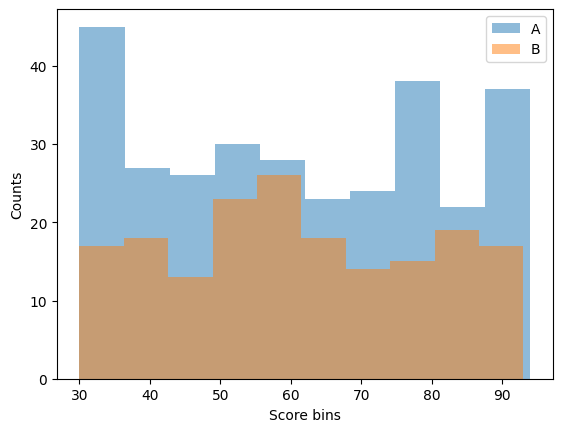

    A     B
0  74  30.0
1  30  59.0
2  35  69.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')

plt.hist(df['A'],alpha=0.5,label='A')
plt.hist(df['B'].dropna(),alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

print(df.head(3))

In [9]:
from scipy.stats import shapiro

print(shapiro(df['A']))
print(shapiro(df['B'].dropna()))

#정규성 만족하지 않음 비모수 검정 ㄱㄱ

ShapiroResult(statistic=0.93753981590271, pvalue=6.175894240456614e-10)
ShapiroResult(statistic=0.9639433026313782, pvalue=0.00013568344002123922)


In [10]:
import scipy.stats
dir(scipy.stats)

['BootstrapMethod',
 'CensoredData',
 'ConstantInputWarning',
 'Covariance',
 'DegenerateDataWarning',
 'FitError',
 'MonteCarloMethod',
 'NearConstantInputWarning',
 'PermutationMethod',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_axis_nan_policy',
 '_biasedurn',
 '_binned_statistic',
 '_binomtest',
 '_boost',
 '_censored_data',
 '_common',
 '_constants',
 '_continuous_distns',
 '_covariance',
 '_crosstab',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_entropy',
 '_fit',
 '_hypotests',
 '_kde',
 '_ksstats',
 '_levy_stable',
 '_mannwhitneyu',
 '_morestats',
 '_mstats_basic',
 '_mstats_extras',
 '_multicomp',
 '_multivariate',
 '_mvn',
 '_odds_ratio',
 '_page_trend_test',
 '_qmc',
 '_qmc_cy',
 '_qmvnt',
 '_rcont',
 '_relative_risk',
 '_resampling',
 '_rvs_sampling',
 '_sensitivity_analysis',
 '_sobol',
 '_statlib',
 '_stats',
 '_stats_mstats_common',
 '_stats_py',
 '_s

In [12]:
from scipy.stats import ranksums, mannwhitneyu

print(mannwhitneyu(df['A'],df['B'].dropna()))
print(ranksums(df['A'],df['B'].dropna()))

#피밸류가 0.05보다 커서 귀무가설 기각할수 없다 따라서 평균은 동일하다

MannwhitneyuResult(statistic=27036.0, pvalue=0.9807458376150018)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)


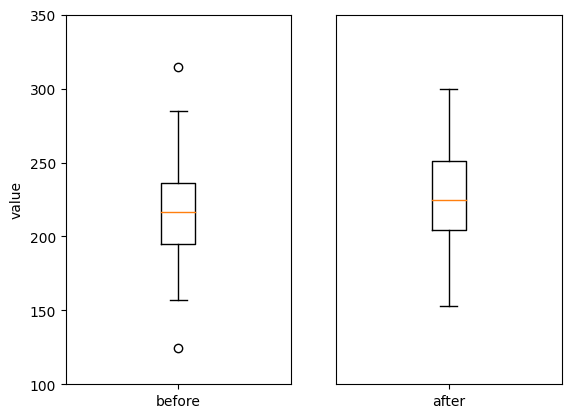

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(100,350)
ax[1].set_ylim(100,350)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [17]:
from scipy.stats import shapiro

print(shapiro(df['before']))
print(shapiro(df['after']))

#pvalue가 0.05보다 큼 따라서 정규성을 만족

ShapiroResult(statistic=0.9907895922660828, pvalue=0.6065835952758789)
ShapiroResult(statistic=0.9916961193084717, pvalue=0.6923638582229614)


In [24]:
from scipy.stats import levene
from scipy.stats import fligner
from scipy.stats import bartlett

after = df['after']
before =df['before']

print(bartlett(after,before))

print(levene(after,before, center='mean'))
print(levene(after,before, center='median'))

print(fligner(after,before, center='mean'))
print(fligner(after,before, center='median'))

#정규성은 만족 등분산성을 가짐

BartlettResult(statistic=0.01622416407141321, pvalue=0.8986443060050282)
LeveneResult(statistic=0.0799240534801954, pvalue=0.7776460750812457)
LeveneResult(statistic=0.06427968690211128, pvalue=0.8000741651677987)
FlignerResult(statistic=0.08599118996783937, pvalue=0.7693367667843737)
FlignerResult(statistic=0.08084320671002646, pvalue=0.7761579588763045)


In [29]:
from scipy.stats import ttest_rel

print(ttest_rel(after, before, alternative='two-sided'))

#pvalue가 0.05보다 작으므로 귀무가설 기각한다 투약 전후 변화가 있다

TtestResult(statistic=2.5535473487670677, pvalue=0.011926744724546513, df=119)


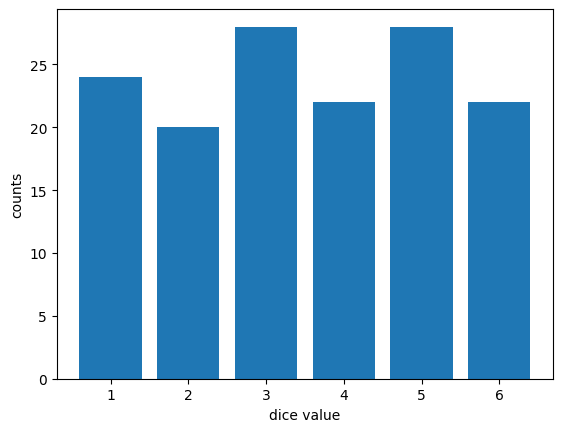

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')

plt.bar(df.dice_number,df.counts)
plt.xlabel('dice value')
plt.ylabel('counts')
plt.show()

In [ ]:
from scipy.stats import chi_contingency
